In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

# Generating an example Signal

In [27]:
# Length of the signal.
N = 100
# Time axis.
t_vec = np.arange(N)
# First signal is just a change point on the last third of the time.
y0 = np.zeros(N)
t_cp = N * 2 // 3
amp_cp = 3
y0[t_cp:] += amp_cp

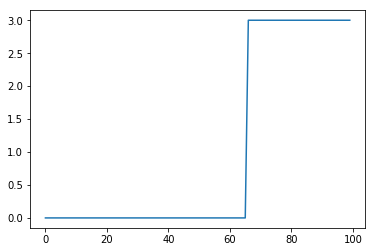

In [28]:
plt.plot(t_vec, y0)

In [29]:
### Adding trend.
trend = 4
trend_t = np.linspace(0, trend, N)
y1 = y0 + trend_t

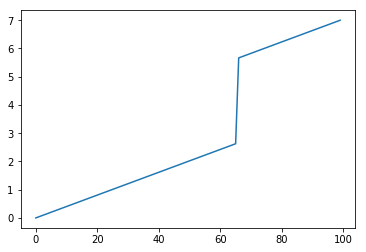

In [30]:
plt.plot(t_vec, y1)

In [31]:
### Adding seasonality.
# Period or pulation.
w = 24
# Output signal
y2 = y1 + np.sin(2 * np.pi * t_vec / w)

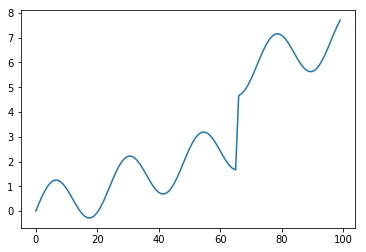

In [32]:
plt.plot(t_vec, y2)

In [13]:
# Adding Random noise of std sig.
sig = 1.
e = np.random.normal(loc=0, scale=sig, size=N)
y3 = y2 + e

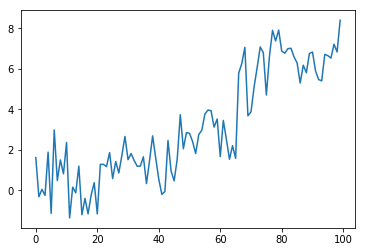

In [33]:
plt.plot(t_vec, y3)

Let's wrap all of that in a function

In [7]:
def generate_signal(N=100, r_cp=0.66, amp_cp=3, trend=4, puls=24, sig_noise=1.):
    """ Generate a time serie with change point, trend, seasonality, and noise
    Return the decomposition of the signal from raw to final, and a bool that indicate
    if there was a change point.
    """
    ### Initialize time and signal of length N.
    t = np.arange(N)
    y0 = np.zeros(N)
    ### Adding a change point (cp) if the change amplitude is different from 0.
    there_is_cp = amp_cp != 0
    if there_is_cp:
        t_cp = int(N * r_cp)
        y0[t_cp:] += amp_cp
    ### Adding trend if trend amplitude different from 0.
    if trend != 0:
        y1 = y0 + np.linspace(0, trend, N)
    else: y1 = y0
    ### Adding seasonality if pulsation is different from infinite.
    if puls != np.inf:
        y2 = y1 + np.sin(2 * np.pi * t / puls)
    else: y2 = y1
    ### Adding noise if std of noise different from 0.
    if sig_noise != 0:
        y3 = y2 + np.random.normal(loc=0, scale=sig_noise, size=N)
    else: y3 = y2
    return y0, y1, y2, y3, there_is_cp 

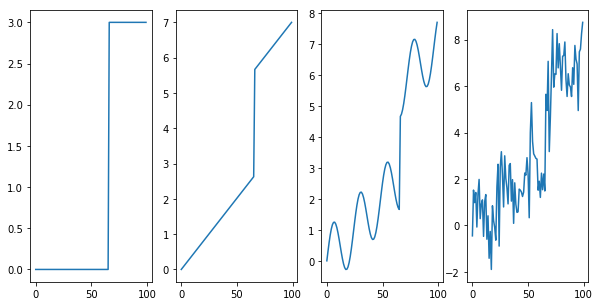

In [8]:
test = generate_signal()
fig, ax = plt.subplots(1, 4, figsize=(10, 5))
for i in range(4):
    ax[i].plot(test[i])